In [1]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
import pandas as pd
from convert_fm import convert_img_ppm_to_Hz_data, convert_ppm_data_to_Hz_data
from demod import demod_pls
from extract_metric import extract_metrics

# <span style="color:orange"> *db0_033 processing* </span> 

In [2]:
path_to_fms = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/sim/fms"
path_to_dmod_mask = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/sim/D2_D3_masks/cord_mask.nii.gz"
path_to_labeled_cord = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/sim/D2_D3_masks/cord_mask_labeled.nii.gz"
path_to_metrics = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/sim/D4_metrics"
path_to_dmod_folder = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/sim/V1_dmod_sim"

## Measured B0 - Inspiration & Expiration

### <span style="color:green"> Expiration </span> 

In [3]:
path_to_exp_meas = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C1_meas/exp/tests/test1/B0.nii"
path_to_exp_dmod_mask = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/processing_steps/D1_D2_label_vert/exp/cord_mask.nii.gz"
path_to_exp_metric_mask = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/processing_steps/D1_D2_label_vert/exp/cord_mask_labeled.nii.gz"

In [4]:
# Load images and get nifti data to manipulate!
exp_B0_meas_img = nib.load(path_to_exp_meas)
exp_B0_meas_data = exp_B0_meas_img.get_fdata()

exp_dmod_mask_img = nib.load(path_to_exp_dmod_mask)
exp_dmod_mask_data = exp_dmod_mask_img.get_fdata()

exp_metric_mask_img = nib.load(path_to_exp_metric_mask)
exp_metric_mask_data = exp_metric_mask_img.get_fdata()

In [5]:
exp_dmod_value = np.mean(exp_B0_meas_data[exp_dmod_mask_data==1])
print("Expiration demod value: ",exp_dmod_value," Hz")

Expiration demod value:  286.7117539335603  Hz


In [6]:
exp_dmod_B0_meas = exp_B0_meas_data - exp_dmod_value
# Create nifti and save
exp_dmod_B0_meas_img = nib.Nifti1Image(exp_dmod_B0_meas, affine = exp_B0_meas_img.affine)
path_to_exp_dmod_fm = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/exp/exp_dmod_B0_meas.nii.gz"
nib.save(exp_dmod_B0_meas_img,path_to_exp_dmod_fm)

In [8]:
# Extract metrics, plot and save value
exp_B0_metrics_path =  "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/exp/exp_metrics.csv"
extract_metrics(path_to_exp_dmod_fm, path_to_exp_dmod_mask, path_to_exp_metric_mask, exp_B0_metrics_path, method='wa', vert="3:14")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/exp/exp_dmod_B0_meas.nii.gz -f E:/msc_data/ismrm_2025/dB0_033_dup1/fm/processing_steps/D1_D2_label_vert/exp/cord_mask.nii.gz -method wa -vert 3:14 -vertfile E:/msc_data/ismrm_2025/dB0_033_dup1/fm/processing_steps/D1_D2_label_vert/exp/cord_mask_labeled.nii.gz -perlevel 1 -o E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/exp/exp_metrics.csv
--


Load metric image...
Estimation for label: cord_mask

Done! To view results, type:
start E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/exp/exp_metrics.csv




In [9]:
exp_B0_metrics_path =  "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/exp/exp_metrics.csv"
exp_metrics_df = pd.read_csv(exp_B0_metrics_path)
exp_metrics_data = exp_metrics_df['WA()']
exp_metrics_data = exp_metrics_data[::-1]
exp_metrics_data

11   -104.288259
10   -104.903085
9     -52.632774
8       7.312257
7      82.732032
6     118.993209
5      92.495091
4      72.811925
3      80.455386
2      87.574000
1      85.216214
0      65.690197
Name: WA(), dtype: float64

### <span style="color:red"> Inspiration </span> 

In [11]:
path_to_insp_meas = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C1_meas/insp/tests/test1/B0.nii"
path_to_insp_dmod_mask = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/processing_steps/D1_D2_label_vert/insp/cord_mask.nii.gz"
path_to_insp_metric_mask = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/processing_steps/D1_D2_label_vert/insp/cord_mask_labeled.nii.gz"

In [12]:
# Load images and get nifti data to manipulate!
insp_B0_meas_img = nib.load(path_to_insp_meas)
insp_B0_meas_data = insp_B0_meas_img.get_fdata()

insp_dmod_mask_img = nib.load(path_to_insp_dmod_mask)
insp_dmod_mask_data = insp_dmod_mask_img.get_fdata()

insp_metric_mask_img = nib.load(path_to_insp_metric_mask)
insp_metric_mask_data = insp_metric_mask_img.get_fdata()

In [13]:
insp_dmod_value = np.mean(insp_B0_meas_data[insp_dmod_mask_data==1])
print("Inspiration demod value: ",insp_dmod_value," Hz")

Inspiration demod value:  -251.19584863446968  Hz


In [14]:
insp_dmod_B0_meas = insp_B0_meas_data - insp_dmod_value
# Create nifti and save
insp_dmod_B0_meas_img = nib.Nifti1Image(insp_dmod_B0_meas, affine = insp_B0_meas_img.affine)
path_to_insp_dmod_fm = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/insp/insp_dmod_B0_meas.nii.gz"
nib.save(insp_dmod_B0_meas_img, path_to_insp_dmod_fm)

In [15]:
insp_B0_metrics_path = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/insp/insp_metrics.csv"
extract_metrics(path_to_insp_dmod_fm, path_to_insp_dmod_mask, path_to_insp_metric_mask, insp_B0_metrics_path, method='wa', vert="3:14")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/insp/insp_dmod_B0_meas.nii.gz -f E:/msc_data/ismrm_2025/dB0_033_dup1/fm/processing_steps/D1_D2_label_vert/insp/cord_mask.nii.gz -method wa -vert 3:14 -vertfile E:/msc_data/ismrm_2025/dB0_033_dup1/fm/processing_steps/D1_D2_label_vert/insp/cord_mask_labeled.nii.gz -perlevel 1 -o E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/insp/insp_metrics.csv
--


Load metric image...
Estimation for label: cord_mask

Done! To view results, type:
start E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/insp/insp_metrics.csv




In [16]:
insp_B0_metrics_path = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/insp/insp_metrics.csv"
insp_metrics_df = pd.read_csv(insp_B0_metrics_path)
insp_metrics_data = insp_metrics_df['WA()']
insp_metrics_data = insp_metrics_data[::-1]
insp_metrics_data

11   -121.378285
10   -116.873735
9     -53.993132
8      21.573222
7     104.863748
6     135.128111
5      67.438657
4      22.028257
3      10.687637
2      10.522335
1      11.893407
0       5.928425
Name: WA(), dtype: float64

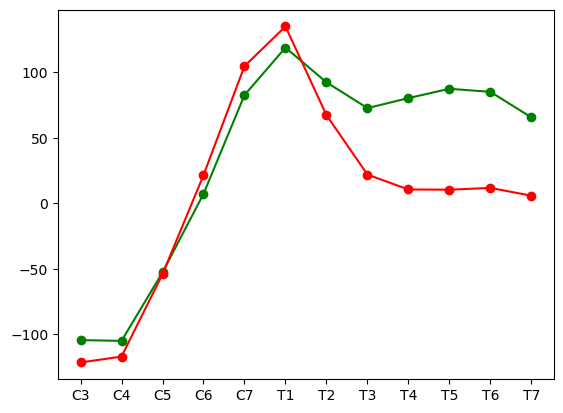

In [18]:
vertebrae_levels = ['C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 3 to 14
plt.plot(vertebrae_levels, exp_metrics_data, marker = 'o', linestyle = '-', label = "dmod Exp B0 measured", color = "green")
plt.plot(vertebrae_levels, insp_metrics_data, marker = 'o', linestyle = '-', label = "dmod Insp B0 measured", color = "red")

### <span style="color:#C28AD1"> Average Insp and Exp </span> 

In [20]:
avg_respiration = (exp_metrics_data+ insp_metrics_data )/2
avg_respiration

11   -112.833272
10   -110.888410
9     -53.312953
8      14.442740
7      93.797890
6     127.060660
5      79.966874
4      47.420091
3      45.571511
2      49.048168
1      48.554811
0      35.809311
Name: WA(), dtype: float64

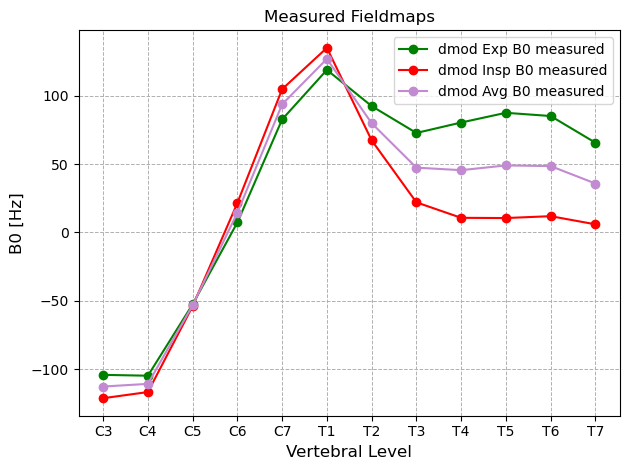

In [22]:
vertebrae_levels = ['C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 3 to 14
plt.plot(vertebrae_levels, exp_metrics_data, marker = 'o', linestyle = '-', label = "dmod Exp B0 measured", color = "green")
plt.plot(vertebrae_levels, insp_metrics_data, marker = 'o', linestyle = '-', label = "dmod Insp B0 measured", color = "red")
plt.plot(vertebrae_levels, avg_respiration, marker = 'o', linestyle = '-', label = "dmod Avg B0 measured", color = "#C28AD1")

plt.title("Measured Fieldmaps")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [23]:
# Export average!
avg_respiration.to_csv("E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C_dmod_meas/simple_avg_respiration.csv",index=False,header=True)